In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



C:\Users\Eugenio\AppData\Local\Temp\ipykernel_9540\2180263200.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.style.use("dark_background")

In [3]:
df_crime_cvp_pe = pd.read_excel("Microdados_de_CVP_-_Disponível_janeiro_de_2014_a_fevereiro_de_2024.xlsx")

df_crime_cvp_pe.head()

,DATA,ANO,MUNICIPIO,REGIÃO_GEO,TOTAL
0,2014-01-01,2014,ABREU E LIMA,REGIÃO METROPOLITANA,1
1,2014-01-01,2014,ARCOVERDE,SERTÃO,3
2,2014-01-01,2014,BELO JARDIM,AGRESTE,1
3,2014-01-01,2014,BONITO,AGRESTE,1
4,2014-01-01,2014,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,2


In [4]:
df_crime_cvp_pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152828 entries, 0 to 152827
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DATA        152828 non-null  datetime64[ns]
 1   ANO         152828 non-null  int64         
 2   MUNICIPIO   152828 non-null  object        
 3   REGIÃO_GEO  152828 non-null  object        
 4   TOTAL       152828 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.8+ MB


In [5]:
#Quero saber os anos mais perigosos
#Os Municípios mais perigosos

#Transformar a DATA em dias da semana e ver se algum dia é mais perigoso do que outro

data=df_crime_cvp_pe

crimes_por_ano = data.groupby("ANO")["TOTAL"].sum().reset_index()

display(crimes_por_ano)


,ANO,TOTAL
0,2014,65271
1,2015,85076
2,2016,115473
3,2017,120677
4,2018,95348
5,2019,79765
6,2020,53320
7,2021,52094
8,2022,50237
9,2023,45780


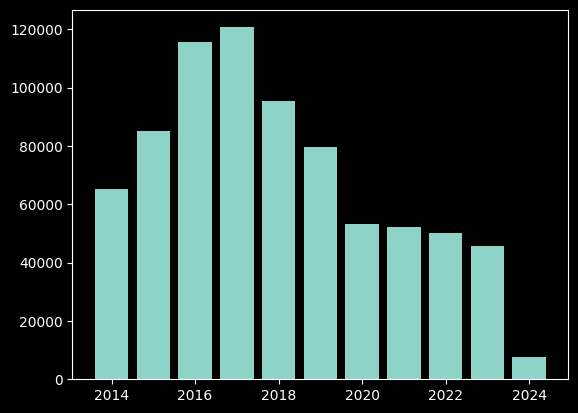

In [6]:
grafico_crimes_ano = plt.bar("ANO", "TOTAL", data=crimes_por_ano)

In [7]:
crime_por_municipio = data.groupby("MUNICIPIO")["TOTAL"].sum().reset_index()
display(crime_por_municipio)

crime_municipio_ranking = crime_por_municipio.sort_values(by="TOTAL",ascending=False)

display(crime_municipio_ranking)

,MUNICIPIO,TOTAL
0,ABREU E LIMA,9074
1,AFOGADOS DA INGAZEIRA,360
2,AFRANIO,102
3,AGRESTINA,3186
4,AGUA PRETA,602
...,...,...
180,VERTENTE DO LERIO,245
181,VERTENTES,1391
182,VICENCIA,846
183,VITORIA DE SANTO ANTAO,10372


,MUNICIPIO,TOTAL
132,RECIFE,280331
87,JABOATAO DOS GUARARAPES,64865
111,OLINDA,56244
44,CARUARU,44204
122,PAULISTA,33771
...,...,...
131,QUIXABA,28
80,ITACURUBA,25
42,CARNAUBEIRA DA PENHA,24
77,INGAZEIRA,21


In [8]:
# Criar uma nova coluna com o dia da semana correspondente
data["Dia_da_Semana"] = data["DATA"].dt.dayofweek

# Mapear o número do dia da semana para o nome do dia
dia_da_semana_map = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

data["Dia_da_Semana"] = data["Dia_da_Semana"].map(dia_da_semana_map)

# Exibir o DataFrame com a nova coluna
display(data.head())

,DATA,ANO,MUNICIPIO,REGIÃO_GEO,TOTAL,Dia_da_Semana
0,2014-01-01,2014,ABREU E LIMA,REGIÃO METROPOLITANA,1,Quarta-feira
1,2014-01-01,2014,ARCOVERDE,SERTÃO,3,Quarta-feira
2,2014-01-01,2014,BELO JARDIM,AGRESTE,1,Quarta-feira
3,2014-01-01,2014,BONITO,AGRESTE,1,Quarta-feira
4,2014-01-01,2014,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,2,Quarta-feira


In [9]:
crime_semana = data.groupby("Dia_da_Semana")["TOTAL"].sum().reset_index()

display(crime_semana)

,Dia_da_Semana,TOTAL
0,Domingo,91697
1,Quarta-feira,115092
2,Quinta-feira,113981
3,Segunda-feira,115579
4,Sexta-feira,118364
5,Sábado,102741
6,Terça-feira,113325


,Dia_da_Semana,TOTAL
3,Segunda-feira,115579
6,Terça-feira,113325
1,Quarta-feira,115092
2,Quinta-feira,113981
4,Sexta-feira,118364
5,Sábado,102741
0,Domingo,91697


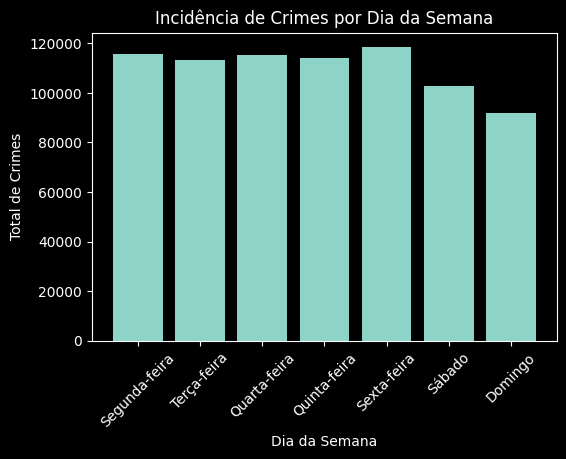

In [10]:
crime_dia_semana = pd.DataFrame(data)

# Ordenando os dados de acordo com a ordem dos dias da semana
ordem_dia_semana = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
crime_dia_semana = crime_semana.sort_values("Dia_da_Semana", key=lambda x: pd.Categorical(x, categories=ordem_dia_semana, ordered=True))

# Exibindo o DataFrame ordenado
display(crime_dia_semana)

# Plotando o gráfico de barras
plt.figure(figsize=(6,4))
plt.bar("Dia_da_Semana", "TOTAL", data=crime_dia_semana)
plt.xlabel("Dia da Semana")
plt.ylabel("Total de Crimes")
plt.title("Incidência de Crimes por Dia da Semana")
plt.xticks(rotation=45)
plt.show()

In [11]:
#Importando a Base de dados da população por Município de Pernambuco

populacao_municipio = pd.read_excel("populacao_municipio_PE.xlsx.")

populacao_municipio.head()



,Municipios,Populacao
0,Abreu e Lima,100698
1,Afogados da Ingazeira,37546
2,Afrânio,19981
3,Agrestina,25240
4,Água Preta,37386


In [12]:
#Padronizando os valores da coluna "Municipios" com os dos dados de crime

#Deixando tudo em letras maiúsculas como no DataFrame original
populacao_municipio["Municipios"] = populacao_municipio["Municipios"].str.upper()
!pip install unidecode
from unidecode import unidecode

# Aplicar a função unidecode aos nomes dos municípios para que fiquem sem acento.
populacao_municipio["Municipios"] = populacao_municipio["Municipios"].apply(unidecode)

display(populacao_municipio)

,Municipios,Populacao
0,ABREU E LIMA,100698
1,AFOGADOS DA INGAZEIRA,37546
2,AFRANIO,19981
3,AGRESTINA,25240
4,AGUA PRETA,37386
...,...,...
180,VERTENTES,21172
181,VICENCIA,32897
182,VITORIA DE SANTO ANTAO,140389
183,XEXEU,14789


In [13]:
#Mergindo as Tabelas

data_com_pop = pd.merge(data, populacao_municipio, left_on='MUNICIPIO', right_on='Municipios', how='inner')

display(data_com_pop)

,DATA,ANO,MUNICIPIO,REGIÃO_GEO,TOTAL,Dia_da_Semana,Municipios,Populacao
0,2014-01-01,2014,ABREU E LIMA,REGIÃO METROPOLITANA,1,Quarta-feira,ABREU E LIMA,100698
1,2014-01-01,2014,ARCOVERDE,SERTÃO,3,Quarta-feira,ARCOVERDE,75295
2,2014-01-01,2014,BELO JARDIM,AGRESTE,1,Quarta-feira,BELO JARDIM,76930
3,2014-01-01,2014,BONITO,AGRESTE,1,Quarta-feira,BONITO,38101
4,2014-01-01,2014,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,2,Quarta-feira,CABO DE SANTO AGOSTINHO,210796
...,...,...,...,...,...,...,...,...
148388,2024-02-29,2024,SAO JOSE DO EGITO,SERTÃO,1,Quinta-feira,SAO JOSE DO EGITO,34210
148389,2024-02-29,2024,SAO LOURENCO DA MATA,REGIÃO METROPOLITANA,1,Quinta-feira,SAO LOURENCO DA MATA,114910
148390,2024-02-29,2024,SURUBIM,AGRESTE,1,Quinta-feira,SURUBIM,66192
148391,2024-02-29,2024,TORITAMA,AGRESTE,1,Quinta-feira,TORITAMA,47088


In [14]:
#Criando a Coluna de Taxa de Crime. É o Total de crimes violentos cometidos de 2014 a fev de 2024 contra 
#a propriedade dividido por 100.000

data_com_pop["Taxa de Crime"] = data_com_pop["TOTAL"] / data_com_pop["Populacao"]*100_000

#Agrupando os municipios pela Taxa de crime criada
taxa_crime_municipios = data_com_pop.groupby("MUNICIPIO")["Taxa de Crime"].sum().reset_index()


In [15]:
#Mudando o formato da coluna ["Taxa de Crime"] para ajudar na visualização
taxa_crime_municipios["Taxa de Crime"] = taxa_crime_municipios["Taxa de Crime"].map('{:,.2f}'.format)

display(taxa_crime_municipios)

#Certificando que a coluna ["Taxa de Crime"] tornou-se um object
taxa_crime_municipios.info()

,MUNICIPIO,Taxa de Crime
0,ABREU E LIMA,"9,011.10"
1,AFOGADOS DA INGAZEIRA,958.82
2,AFRANIO,510.48
3,AGRESTINA,"12,622.82"
4,AGUA PRETA,"1,610.23"
...,...,...
176,VERTENTE DO LERIO,"3,255.38"
177,VERTENTES,"6,570.00"
178,VICENCIA,"2,571.66"
179,VITORIA DE SANTO ANTAO,"7,388.04"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MUNICIPIO      181 non-null    object
 1   Taxa de Crime  181 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [16]:
# Converter a coluna 'Taxa de Crime' para string e remover as vírgulas, depois converter para float
taxa_crime_municipios["Taxa de Crime"] = taxa_crime_municipios["Taxa de Crime"].astype(str).str.replace(',', '').astype(float)

# Classificar o DataFrame pela coluna "Taxa de Crime" 
taxa_crime_municipios_ranking = taxa_crime_municipios.sort_values(by="Taxa de Crime", ascending=False)

# Exibir o DataFrame classificado
display(taxa_crime_municipios_ranking)

,MUNICIPIO,Taxa de Crime
129,RECIFE,16877.07
140,SANTA CRUZ DO CAPIBARIBE,14761.39
109,OLINDA,14284.77
3,AGRESTINA,12622.82
43,CARUARU,11968.28
...,...,...
141,SANTA FILOMENA,355.07
172,TUPANATINGA,320.22
103,MANARI,262.32
41,CARNAUBEIRA DA PENHA,182.97


In [17]:
#Salvando as tabelas em excel para posterior visualização e edição

taxa_crime_municipios.to_excel("Taxa_Crime_Municipios_PE.xlsx", index=False)
taxa_crime_municipios_ranking.to_excel("Taxa_Crime_Municipios_PE_Ranking.xlsx", index=False)

In [18]:
print(populacao_municipio.columns)
print(crime_por_municipio.columns)

populacao_municipio.rename(columns={'Municipios': 'MUNICIPIO'}, inplace=True)

Index(['Municipios', 'Populacao'], dtype='object')
Index(['MUNICIPIO', 'TOTAL'], dtype='object')


A correlação entre a quantidade de crimes e o tamanho da população é de 0.97


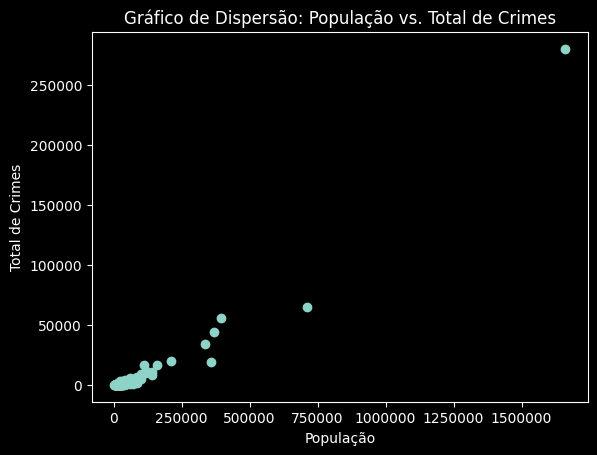

In [19]:
#Agora vamos ver uma correlação entre População e Crimes
#fazer o merge de populacao_municipio com crime por municipio

crime_pop_municipio = pd.merge(populacao_municipio, crime_por_municipio, on='MUNICIPIO')

corr_pop_crime = crime_pop_municipio["Populacao"].corr(crime_pop_municipio["TOTAL"])


print(f"A correlação entre a quantidade de crimes e o tamanho da população é de {corr_pop_crime:.2f}")

plt.scatter(crime_pop_municipio["Populacao"], crime_pop_municipio["TOTAL"])
plt.xlabel("População")
plt.ylabel("Total de Crimes")

# Adicionar título ao gráfico
plt.title("Gráfico de Dispersão: População vs. Total de Crimes")

# Desativar a notação científica no eixo x
plt.ticklabel_format(style='plain', axis='x')
plt.style.use('dark_background')

# Exibir o gráfico
plt.show()




In [20]:
#Como era de se esperar, a quantidade de crimes aumenta quase perfeitamente de acordo com a população

In [21]:
#Agora vamos pegar as cidades com a maior população, mas com a menor quantidade de crimes:

crime_pop_municipio_sorted = crime_pop_municipio.sort_values(by=["Populacao", "TOTAL"], ascending=[False, True])

# Selecionar as top 10 cidades com maior população e menos crimes
crime_pop_municipio_sorted.head(10)

# Exibir as cidades selecionadas

,MUNICIPIO,Populacao,TOTAL
128,RECIFE,1661017,280331
85,JABOATAO DOS GUARARAPES,711330,64865
108,OLINDA,393734,56244
43,CARUARU,369343,44204
123,PETROLINA,359372,18740
119,PAULISTA,336919,33771
29,CABO DE SANTO AGOSTINHO,210796,20259
35,CAMARAGIBE,159945,16574
65,GARANHUNS,141347,7874
179,VITORIA DE SANTO ANTAO,140389,10372


In [22]:
crime_pop_municipio = crime_pop_municipio.merge(taxa_crime_municipios[["MUNICIPIO","Taxa de Crime"]], on="MUNICIPIO")

crime_pop_municipio.head()

,MUNICIPIO,Populacao,TOTAL,Taxa de Crime
0,ABREU E LIMA,100698,9074,9011.10
1,AFOGADOS DA INGAZEIRA,37546,360,958.82
2,AFRANIO,19981,102,510.48
3,AGRESTINA,25240,3186,12622.82
4,AGUA PRETA,37386,602,1610.23


In [23]:
corr_taxa_pop = crime_pop_municipio["Taxa de Crime"].corr(crime_pop_municipio["Populacao"])
print(f"A correlação entre a população e a taxa de crime é de {corr_taxa_pop:.2f}")

A correlação entre a população e a taxa de crime é de 0.52


In [24]:
#Agora vamos buscar as cidades com mais população, mas com a menor taxa de crimes:

crime_pop_municipio_sorted = crime_pop_municipio.sort_values(by=["Populacao", "Taxa de Crime"], ascending=[False, True])

crime_pop_municipio_sorted.head(10)

,MUNICIPIO,Populacao,TOTAL,Taxa de Crime
128,RECIFE,1661017,280331,16877.07
85,JABOATAO DOS GUARARAPES,711330,64865,9118.83
108,OLINDA,393734,56244,14284.77
43,CARUARU,369343,44204,11968.28
123,PETROLINA,359372,18740,5214.65
119,PAULISTA,336919,33771,10023.48
29,CABO DE SANTO AGOSTINHO,210796,20259,9610.71
35,CAMARAGIBE,159945,16574,10362.31
65,GARANHUNS,141347,7874,5570.69
179,VITORIA DE SANTO ANTAO,140389,10372,7388.04


In [25]:
taxa_crime_municipios_ranking.head(10)

,MUNICIPIO,Taxa de Crime
129,RECIFE,16877.07
140,SANTA CRUZ DO CAPIBARIBE,14761.39
109,OLINDA,14284.77
3,AGRESTINA,12622.82
43,CARUARU,11968.28
35,CAMARAGIBE,10362.31
73,IGARASSU,10055.98
120,PAULISTA,10023.48
53,CUPIRA,9976.48
164,TAQUARITINGA DO NORTE,9853.42


In [26]:
#As cidades que estão no topo da taxa de crime, mas não estão entre as cidades crime_pop_municipio_sorted.head(10) 
#Não são cidades interessantes.

In [27]:
# Normalizar as variáveis população e taxa de crimes
crime_pop_municipio['Populacao_Normalizada'] = (crime_pop_municipio['Populacao'] - crime_pop_municipio['Populacao'].min()) / (crime_pop_municipio['Populacao'].max() - crime_pop_municipio['Populacao'].min())
crime_pop_municipio['Taxa de Crime_Normalizada'] = (crime_pop_municipio['Taxa de Crime'] - crime_pop_municipio['Taxa de Crime'].min()) / (crime_pop_municipio['Taxa de Crime'].max() - crime_pop_municipio['Taxa de Crime'].min())

# Calcular a pontuação combinada
crime_pop_municipio['Pontuacao_Combinada'] = crime_pop_municipio['Populacao_Normalizada'] * (1 - crime_pop_municipio['Taxa de Crime_Normalizada'])

# Ordenar as cidades pela pontuação combinada em ordem decrescente
crime_pop_municipio_ordenado = crime_pop_municipio.sort_values(by='Pontuacao_Combinada', ascending=False)

# Selecionar as top 10 cidades com maiores pontuações
#cidades_selecionadas = crime_pop_municipio_ordenado.head(10)
display(crime_pop_municipio_ordenado)

crime_pop_municipio_ordenado.to_excel("crime_pop_municipio_ordenado.xlsx")


,MUNICIPIO,Populacao,TOTAL,Taxa de Crime,Populacao_Normalizada,Taxa de Crime_Normalizada,Pontuacao_Combinada
85,JABOATAO DOS GUARARAPES,711330,64865,9118.83,0.427167,0.535930,0.198235
123,PETROLINA,359372,18740,5214.65,0.214872,0.302396,0.149896
119,PAULISTA,336919,33771,10023.48,0.201329,0.590043,0.082536
43,CARUARU,369343,44204,11968.28,0.220887,0.706374,0.064858
65,GARANHUNS,141347,7874,5570.69,0.083364,0.323693,0.056380
...,...,...,...,...,...,...,...
34,CALUMBI,5744,39,678.97,0.001571,0.031088,0.001522
79,ITACURUBA,5013,25,498.70,0.001130,0.020305,0.001107
76,INGAZEIRA,4537,21,462.86,0.000843,0.018161,0.000827
128,RECIFE,1661017,280331,16877.07,1.000000,1.000000,0.000000
